<a href="https://colab.research.google.com/github/ChandrashekharM3018/FinalYear/blob/main/Corona%20Detection%20from%20X-ray%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os

data_path = "/content/drive/MyDrive/Copy of corona/train"
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'corona': 0, 'normal': 1}
['corona', 'normal']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [4]:
np.save('data',data)
np.save('target',new_target)

In [5]:
data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.1192 - accuracy: 0.4457WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
6/6 [==============================] - 1s 207ms/step - loss: 1.1192 - accuracy: 0.4457 - val_loss: 0.6956 - val_accuracy: 0.4091
Epoch 2/20
6/6 [==============================] - 1s 141ms/step - loss: 0.6903 - accuracy: 0.5943 - val_loss: 0.6851 - val_accuracy: 0.9773
Epoch 3/20
6/6 [==============================] - 1s 161ms/step - loss: 0.6752 - accuracy: 0.9600 - val_loss: 

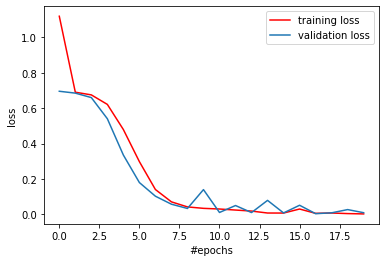

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

1/1 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
[0.005508054047822952, 1.0]


In [11]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf 
model = tf.keras.models.load_model('/content/model-017.model')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



 Prediction : Normal


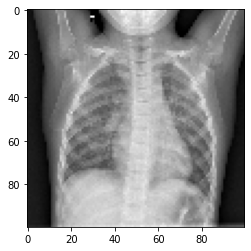

In [15]:
img = image.load_img('/content/drive/MyDrive/Copy of corona/test/normal/IM-0115-0001.jpeg', target_size=(100, 100))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0

classes = model.predict_classes(x, batch_size=10)
if classes == [0]:
   print(" \n\n Prediction : corona")
else:
   print("\n\n Prediction : Normal")